In [1]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
#conda install -c conda-forge python-graphviz (para evitar warnings)
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv("emails.csv")
dataset

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
df_emails = dataset
df_emails.head(3)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Defining the last column as a class to be predicted and trained
classe = df_emails.iloc[:,3001].values
classe

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [5]:
# We dont get the last column and the first one
forecasters = df_emails.iloc[:,1:3001]
forecasters

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [6]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(forecasters,
                                                                  classe,
                                                                  test_size = 0.2,
                                                                  random_state = 0)

In [7]:
# Creating and training the model
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [8]:
# Forecasting using the test
previsoes = naive_bayes.predict(X_teste)
previsoes

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [9]:
# Calculating the hit rate
hr_nb = accuracy_score(y_teste, previsoes)*100
hr_nb

95.84541062801932

In [10]:
# Cross Validation
cv_nb = cross_val_score(naive_bayes,X_treinamento, y_treinamento , cv=10)
cv_nb=cv_nb.mean()*100
cv_nb

95.21435004854311

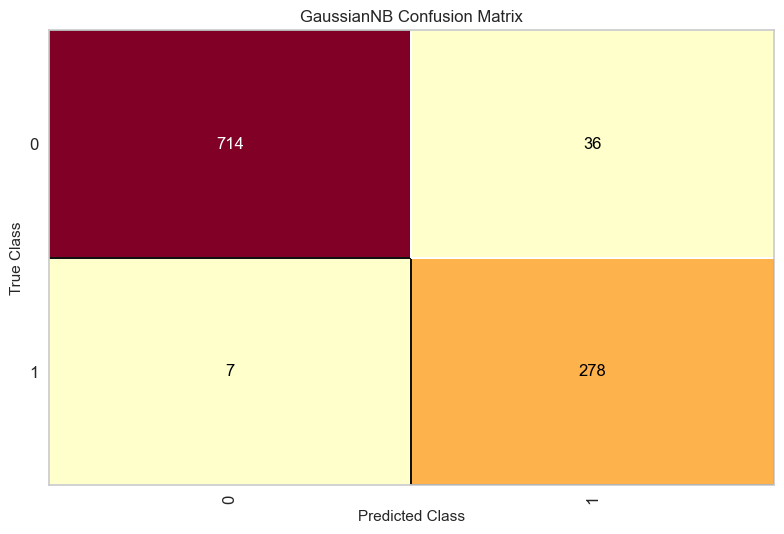

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
# Showing the confusion matrix
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [12]:
# Creating and training the model
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [13]:
# Exporting the decision tree to the .dot format so we can see later:
export_graphviz(arvore, out_file = 'tree.dot')

In [14]:
# Forecasting: 
previsoestree = arvore.predict(X_teste)
previsoestree

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [15]:
# Hit rate
hr_dt = accuracy_score(y_teste, previsoestree)*100
hr_dt

93.33333333333333

In [16]:
# Cross Validation
from sklearn.model_selection import cross_val_score
cv_dt = cross_val_score(arvore,X_treinamento, y_treinamento , cv=10)
cv_dt=cv_dt.mean()*100
cv_dt

92.60290556900725

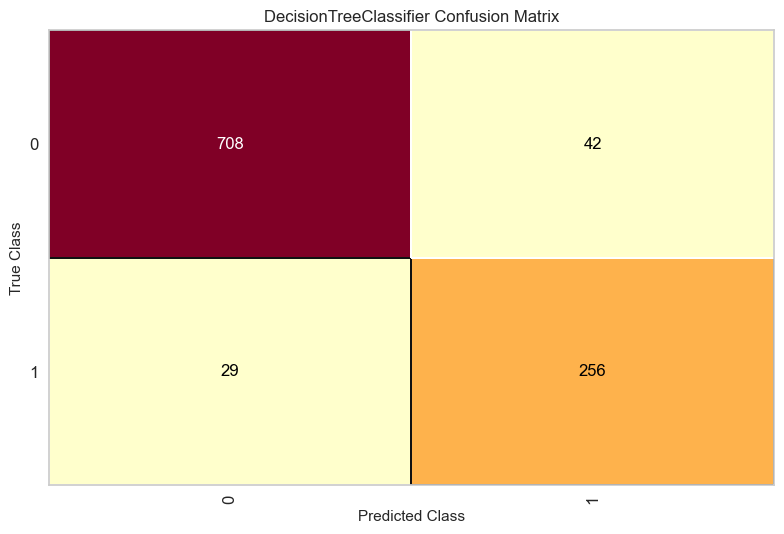

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [17]:
# Showing the confusion matrix
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [18]:
# Creating the model and training:
floresta = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=0)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [19]:
# Geting the Forecast and the Hit rate:
previsoes = floresta.predict(X_teste)
hr_rf = accuracy_score(y_teste, previsoes)*100
hr_rf

96.42512077294685

In [20]:
# Cross Validation
cv_rf = cross_val_score(floresta,X_treinamento, y_treinamento , cv=10)
cv_rf=cv_rf.mean()*100
cv_rf

97.09934379057444

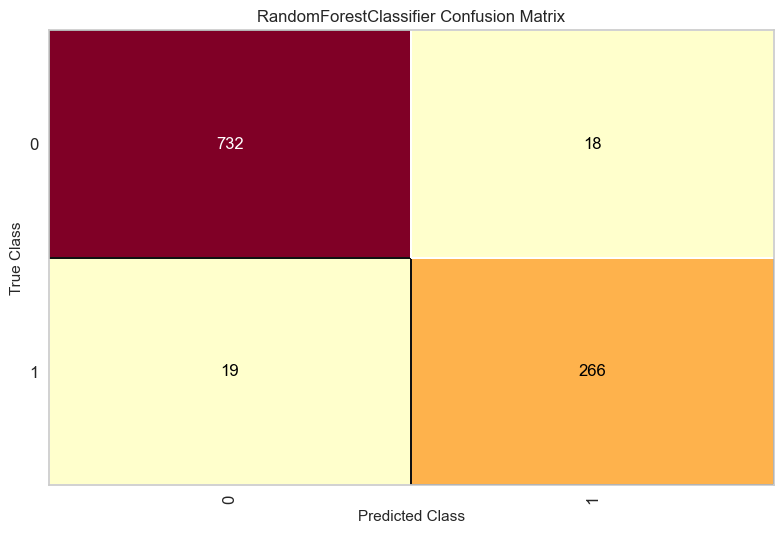

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
# Showing the confusion matrix
v = ConfusionMatrix(RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=0))
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [22]:
# Fitting Logistic Regression to the training set  
log_reg = LogisticRegression(max_iter=1000,random_state=0)
log_reg.fit(X_treinamento,y_treinamento)

LogisticRegression(max_iter=1000, random_state=0)

In [23]:
# Geting the Forecast and the Hit rate:
previsoes = log_reg.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
hr_lr = accuracy_score(y_teste, previsoes)*100
hr_lr

96.71497584541063

In [24]:
# Cross Validation
cv_lr = cross_val_score(log_reg,X_treinamento, y_treinamento , cv=10)
cv_lr=cv_lr.mean()*100
cv_lr

97.12320595150365

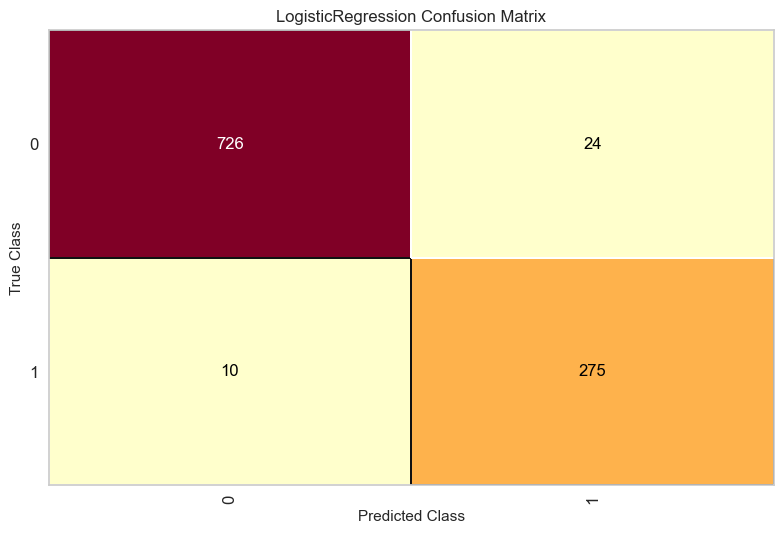

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [25]:
# Showing the confusion matrix
v = ConfusionMatrix(LogisticRegression(max_iter=1000,random_state=0))
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [26]:
svc = SVC(kernel='linear', random_state=0)  
svc.fit(X_treinamento, y_treinamento)

SVC(kernel='linear', random_state=0)

In [27]:
# Geting the Forecast and the Hit rate:
previsoes = svc.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
hr_svc = accuracy_score(y_teste, previsoes)*100
hr_svc

94.3961352657005

In [28]:
# Cross Validation
cv_svc = cross_val_score(svc,X_treinamento, y_treinamento , cv=10)
cv_svc=cv_svc.mean()*100
cv_svc

95.62451018235836

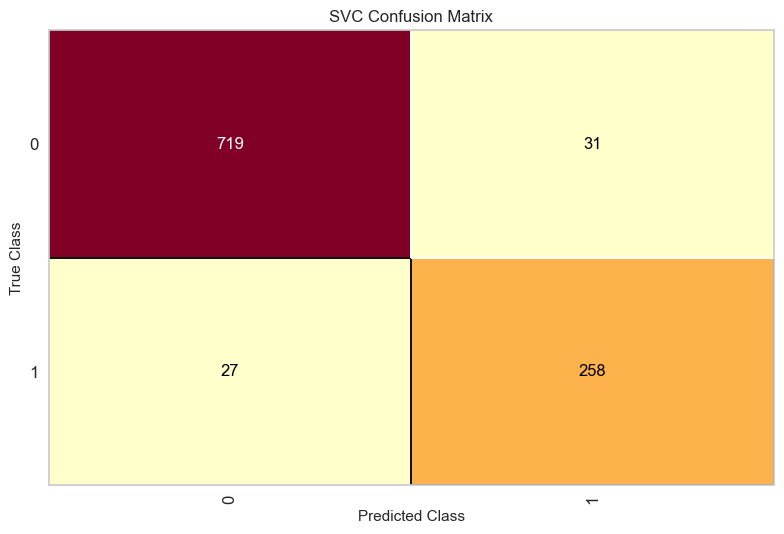

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
# Showing the confusion matrix
v = ConfusionMatrix(SVC(kernel='linear', random_state=0))
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [30]:
print("Algorithms analised: ")
print("Naive Bayes: "+str(round(hr_nb,2))+" % of accuracy and "+str(round(cv_nb,2))+" % on the cross validation mean")
print("Decision Tree: "+str(round(hr_dt,2))+" % of accuracy and "+str(round(cv_dt,2))+" % on the cross validation mean")
print("Random Forest: "+str(round(hr_rf,2))+" % of accuracy and "+str(round(cv_rf,2))+" % on the cross validation mean")
print("Logistic Regression: "+str(round(hr_lr,2))+" % of accuracy and "+str(round(cv_lr,2))+" % on the cross validation mean")
print("Suport Vector Machine: "+str(round(hr_svc,2))+" % of accuracy and "+str(round(cv_svc,2))+" % on the cross validation mean")

Algorithms analised: 
Naive Bayes: 95.85 % of accuracy and 95.21 % on the cross validation mean
Decision Tree: 93.33 % of accuracy and 92.6 % on the cross validation mean
Random Forest: 96.43 % of accuracy and 97.1 % on the cross validation mean
Logistic Regression: 96.71 % of accuracy and 97.12 % on the cross validation mean
Suport Vector Machine: 94.4 % of accuracy and 95.62 % on the cross validation mean
